<a href="https://colab.research.google.com/github/parthnijh/customer-churn-prediction/blob/main/ann_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip /content/drive/MyDrive/annchurn.zip -d "/content/drive/MyDrive/ann-churn-prediction"


Archive:  /content/drive/MyDrive/annchurn.zip
replace /content/drive/MyDrive/ann-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("/content/drive/MyDrive/ann-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
pd.to_numeric(df["TotalCharges"],errors="coerce").isnull() # or use .astype(int)

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [13]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df1=df[df["TotalCharges"]!=" "]

In [16]:
df1[df1["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"])

/tmp/ipython-input-1161862034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"])


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

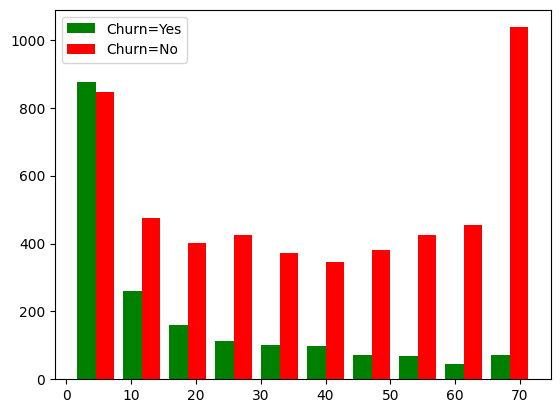

In [21]:
churn_tenure_no=df1[df1["Churn"]=="No"].tenure
churn_tenure_yes=df1[df1["Churn"]=="Yes"].tenure
plt.hist([churn_tenure_yes,churn_tenure_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()

In [22]:
for col in df:
  if(df[col].dtypes=="object"):
    print(f"{col} unique val {df[col].unique()}")

customerID unique val ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique val ['Female' 'Male']
Partner unique val ['Yes' 'No']
Dependents unique val ['No' 'Yes']
PhoneService unique val ['No' 'Yes']
MultipleLines unique val ['No phone service' 'No' 'Yes']
InternetService unique val ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique val ['No' 'Yes' 'No internet service']
OnlineBackup unique val ['Yes' 'No' 'No internet service']
DeviceProtection unique val ['No' 'Yes' 'No internet service']
TechSupport unique val ['No' 'Yes' 'No internet service']
StreamingTV unique val ['No' 'Yes' 'No internet service']
StreamingMovies unique val ['No' 'Yes' 'No internet service']
Contract unique val ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique val ['Yes' 'No']
PaymentMethod unique val ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges unique val ['29.85' '1889.5' '108.15' ... '346.45'

In [23]:
def unique_val(df):
  for col in df:
    if(df[col].dtypes=="object"):
     print(f"{col} unique val {df[col].unique()}")

unique_val(df1)

customerID unique val ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique val ['Female' 'Male']
Partner unique val ['Yes' 'No']
Dependents unique val ['No' 'Yes']
PhoneService unique val ['No' 'Yes']
MultipleLines unique val ['No phone service' 'No' 'Yes']
InternetService unique val ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique val ['No' 'Yes' 'No internet service']
OnlineBackup unique val ['Yes' 'No' 'No internet service']
DeviceProtection unique val ['No' 'Yes' 'No internet service']
TechSupport unique val ['No' 'Yes' 'No internet service']
StreamingTV unique val ['No' 'Yes' 'No internet service']
StreamingMovies unique val ['No' 'Yes' 'No internet service']
Contract unique val ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique val ['Yes' 'No']
PaymentMethod unique val ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique val ['No' 'Yes']


In [24]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)


/tmp/ipython-input-508807632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)
/tmp/ipython-input-508807632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [25]:
unique_val(df1)

customerID unique val ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique val ['Female' 'Male']
Partner unique val ['Yes' 'No']
Dependents unique val ['No' 'Yes']
PhoneService unique val ['No' 'Yes']
MultipleLines unique val ['No' 'Yes']
InternetService unique val ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique val ['No' 'Yes']
OnlineBackup unique val ['Yes' 'No']
DeviceProtection unique val ['No' 'Yes']
TechSupport unique val ['No' 'Yes']
StreamingTV unique val ['No' 'Yes']
StreamingMovies unique val ['No' 'Yes']
Contract unique val ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique val ['Yes' 'No']
PaymentMethod unique val ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique val ['No' 'Yes']


In [26]:
# df1.replace("Yes","1",inplace=True)
# df1.replace("No","0",inplace=True)
array=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]


In [27]:
for col in array:
  df1[col].replace({"Yes":1,"No":0},inplace=True)

/tmp/ipython-input-2199166749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes":1,"No":0},inplace=True)
/tmp/ipython-input-2199166749.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({"Yes":1,"No":0},inplace=True)
/tmp/ipython-input-2199166749.py:2: Sett

In [28]:
unique_val(df1)

customerID unique val ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique val ['Female' 'Male']
InternetService unique val ['DSL' 'Fiber optic' 'No']
Contract unique val ['Month-to-month' 'One year' 'Two year']
PaymentMethod unique val ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [30]:
df1.gender.unique()

array(['Female', 'Male'], dtype=object)

In [31]:
df1.gender.replace({"Female":1,"Male":0},inplace=True)
df1.gender.unique()

/tmp/ipython-input-801793333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({"Female":1,"Male":0},inplace=True)
/tmp/ipython-input-801793333.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.gender.replace({"Female":1,"Male":0},inplace=True)
/tmp/ipython-input-801793333

array([1, 0])

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
cat_cols=[col for col in df if df[col].dtypes=="object"]
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [34]:
df1.drop("customerID",axis=1,inplace=True)

/tmp/ipython-input-2371934649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("customerID",axis=1,inplace=True)


In [35]:
cat_cols=[col for col in df1 if df1[col].dtypes=="object"]
cat_cols


['InternetService', 'Contract', 'PaymentMethod']

In [37]:
# from sklearn.compose import ColumnTransformer

# cat_trans=OneHotEncoder(handle_unknown="ignore",sparse_output="false")
# transformer=ColumnTransformer(transformers=[("cat",cat_trans,cat_cols)])
# transformer.fit_transform

<bound method ColumnTransformer.fit_transform of ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output='false'),
                                 ['InternetService', 'Contract',
                                  'PaymentMethod'])])>

In [38]:
df2=pd.get_dummies(df1,cat_cols)
len(df2.columns)

27

In [39]:
cols_to_scale=["TotalCharges","MonthlyCharges","tenure"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [40]:
unique_val(df2) ## no object dtypes left
X=df2.drop("Churn",axis=1)
y=df2["Churn"]

In [41]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [42]:
Xtrain.shape

(5625, 26)

In [43]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential(
    [
        keras.layers.Dense(26,input_shape=(26,),activation="relu"),#input_shape gives the input layer
        keras.layers.Dense(15,activation="relu"),
        keras.layers.Dense(1,activation="sigmoid"),
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6553 - loss: 0.6135
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7824 - loss: 0.4413
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4331
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4229
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4245
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4080
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4091
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4039
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.4278
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8121 - loss: 0.4002
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4004
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [45]:
model.evaluate(Xtest,ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8066 - loss: 0.4197


[0.4257476329803467, 0.7974413633346558]

In [46]:
ypreds=[]
yp=model.predict(Xtest)
for i in yp:
  if i>0.5:
    ypreds.append(1)
  else:
    ypreds.append(0)


yp[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0.6001131 ],
       [0.01140837],
       [0.12625259],
       [0.8132089 ],
       [0.37004447],
       [0.01129843],
       [0.05931846],
       [0.0223175 ],
       [0.30442244],
       [0.69602144]], dtype=float32)

In [47]:
ypreds[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1]